<a href="https://colab.research.google.com/github/EddyGiusepe/Titanic_Rede_Neural_para_Iniciantes/blob/main/Titanic_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Rede Neural para Iniciantes

Neste Notebook, cobriremos todas as etapas necessárias para treinar, ajustar e avaliar uma rede neural com Dados do Titanic.

\\

## Breve introdução sobre o navio Titanic

Titanic foi um navio de passageiros britânico operado pela **White Star Line** que naufragou no Oceano Atlântico Norte nas primeiras horas da manhã de $15$ de abril de $1912$, após colidir com um iceberg durante sua viagem inaugural de **Southampton** para a cidade de Nova York. Dos cerca de $2\,224$ passageiros e tripulantes a bordo, mais de $1\,500$ morreram, tornando o naufrágio um dos mais mortíferos desastres marítimos comerciais em tempos de paz da história moderna. Embora houvesse cerca de $2\,224$ passageiros e membros da tripulação, recebemos dados de cerca de $1\,300$ passageiros. Desses dados de $1\,300$ passageiros, cerca de $9\,00$ dados são usados para fins de treinamento e os 400 restantes são usados para fins de teste. Nesta competição, recebemos cerca de $400$ dados de teste com coluna sobrevivente ausente e temos que usar diferentes algoritmos de aprendizado de máquina para prever se os passageiros nos dados de teste sobreviveram ou não. Os dados de treinamento e teste não estão limpos (contém muitos valores ausentes (missing)), então o objetivo principal deste Notebook é limpar os dados e construir o modelo com a melhor precisão.


O Conjunto de Dados foram pegos do **Kaggle**. 
A partir de dois trabalhos:

* [Introdção ao Titanic usando rede neural](https://www.kaggle.com/jamesleslie/titanic-neural-network-for-beginners?select=train.csv).

* [Titanic: Neural Network for Beginners](https://www.kaggle.com/jamesleslie/titanic-neural-network-for-beginners?select=train.csv).

* A descrição dos Dados pode ser encontrado [aqui](https://www.kaggle.com/theblackmamba31/getting-started-with-titanic-using-neural-network).


## Importamos nossas bibliotecas

In [1]:
import os
import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline



from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Input, BatchNormalization

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report



## Importamos nossos Dados (train e test) do Titanic

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Apenas_TensorFlow_Eddy/Kaggle/Titanic_Rede_Neural/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Apenas_TensorFlow_Eddy/Kaggle/Titanic_Rede_Neural/test.csv")

In [3]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C


In [4]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,944,2,"Hocking, Miss. Ellen Nellie""""",female,20.0,2,1,29105,23.0,NaN,S


In [5]:
# Construimos nosso DataFrame

df = pd.concat([train, test], axis=0, sort=True)

In [6]:
df.head(6)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877


## Visualização e análise de dados 

A seguir vamos a vizualizar os valores nulos em ambos DataSet (train e test).

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No gráfico de barra (embaixo para train) de valor ausente, podemos concluir que a coluna ``Age``, ``Cabin`` e ``Embarked`` tem valor nulo, então podemos descartar a linha inteira ou preencher o valor ``nan`` com alguns valores como: média, meadian dependendo da variavel.

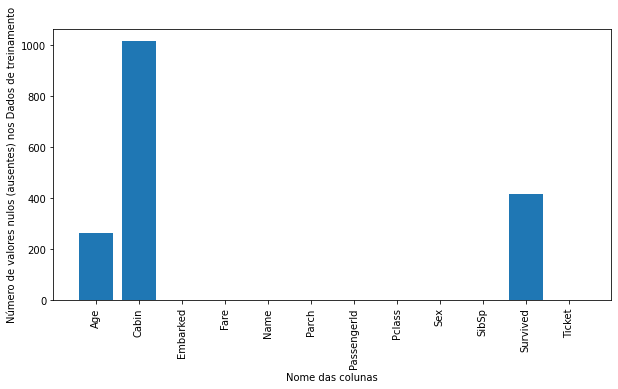

In [8]:
# Para nossos Dados de train

plt.figure(figsize=(10, 5))
plt.bar(df.columns, df.isna().sum())
plt.xlabel("Nome das colunas")
plt.ylabel("Número de valores nulos (ausentes) nos Dados de treinamento")
plt.xticks(rotation=90)
plt.show()


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


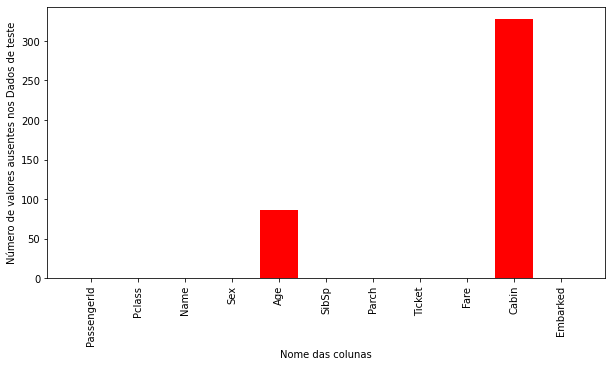

In [10]:
# Para nossos Dados de test

plt.figure(figsize=(10, 5))
plt.bar(test.columns, test.isna().sum(), color='red')
plt.xlabel("Nome das colunas")
plt.ylabel("Número de valores ausentes nos Dados de teste")
plt.xticks(rotation=90)
plt.show()

Podemos observar que a coluna ``Age``, ``Fare`` e ``Cabin`` tem valores ``nan``.

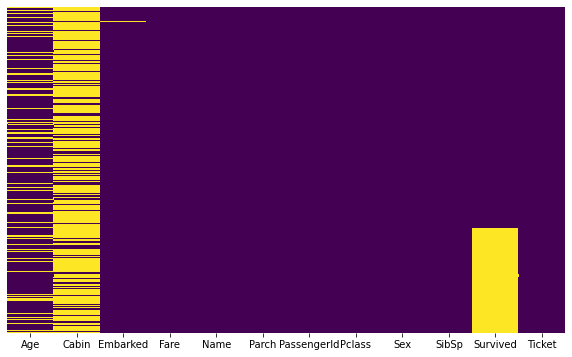

In [11]:
# Podemos visualizar também nossos Dados faltantes em um mapa de calor:
# sns.heatmap(train.isnull())     ou:

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


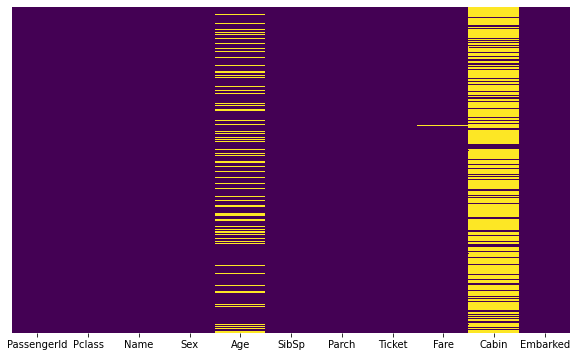

In [12]:
# Para nosso Dados de test
plt.figure(figsize=(10, 6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Visualizando o número de passageiros sobreviventes abaixo, plotamos apenas para nossos Dados de ``train``, já que não temos a coluna ``Survived`` para Dados de teste. Este gráfico mostra que cerca de $600$ pessoas morreram enquanto cerca de $300$ sobreviveram.

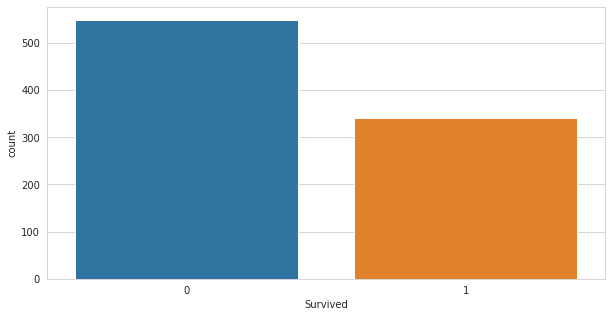

In [13]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)
plt.show()

Vamos a visualizar se o gênero afeta a taxa de sobrevivência (``Survived``) ou não, o gráfico de abaixo mostra claramente que a taxa de mortalidade para passageiros do sexo masculino é muito maior do que para as mulheres.

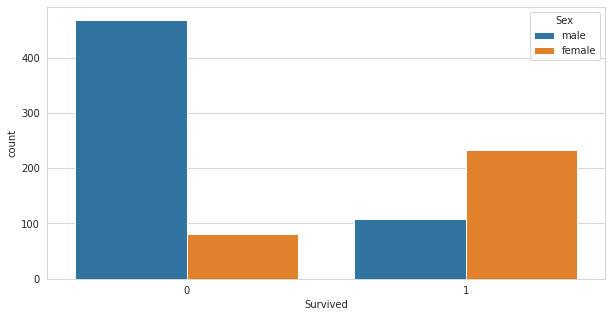

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.show()

Vamos a visualizar se uma classe afeta a taxa de sobrevivência ou não, o gráfico abaixo mostra claramente que as pessoas na terceira classe têm maior probabilidade de morrer.

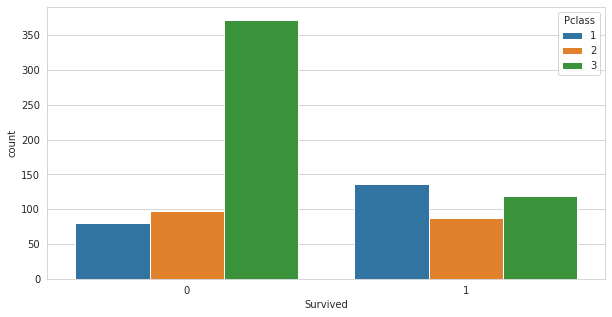

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.show()

Também podemos visualizar o número de passageiros de diferentes colunas embarcadas em ``train`` ou em ``df`` (Dados totais).


Porto de embarque: C = Cherbourg, Q = Queenstown, S = Southampton

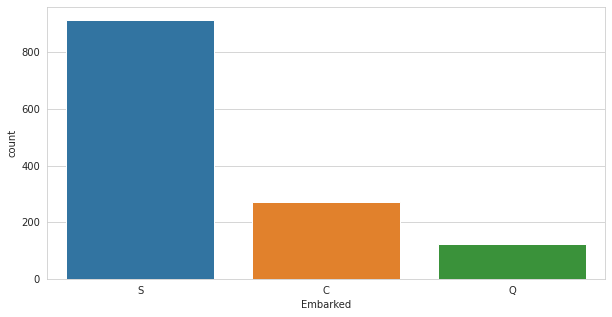

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=df)
plt.show()

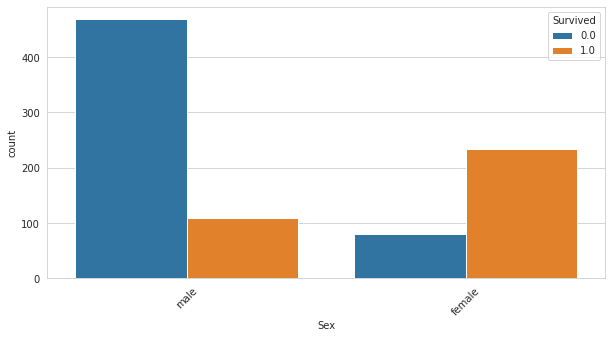

In [17]:
# Também podemos visualizar com respeito a todos nossos Dados

plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xticks(rotation=45)
plt.show()

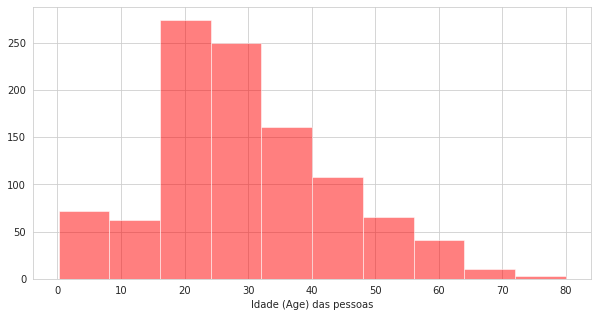

In [18]:
# Também podemos analisar através de um histograma a Idade (Age) das pessoas

plt.figure(figsize=(10, 5))
df['Age'].hist(bins=10, color='red', alpha=0.5)
plt.xlabel("Idade (Age) das pessoas")
plt.show()

O gráfico a seguir mostra que cerca de $1000$ pessoas pagaram entre $0$ e $50$.

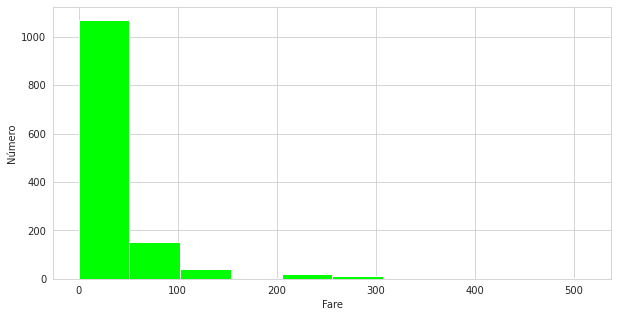

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(x=df.Fare, bins=10, color='lime')
plt.xlabel("Fare")
plt.ylabel("Número")
plt.show()

### Lidando com os valores ausentes (missing)

Primeiro vamos tratar os Dados de ``train`` e logo os Dados de ``test``

In [20]:
# Vamos a eliminar a coluna 'Cabin' porque é uma coluna com muitos Dados missing

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
# Você pode verificar, no mapa de calor, que foi eliminado.

A seguir na coluna 'Age' vamos a preencher com a média das idades e por classes (1, 2 ou 3).

In [21]:
# A seguinte função recebe duas colunas

def inputar_idade(cols):
  Idade = cols[0]
  Classe = cols[1]


  if pd.isnull(Idade):
    if Classe == 1:
      return 37
    elif Classe == 2:
      return 29
    else:
      return 24

  else:
    return Idade        



In [22]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

A partir da visualização de nossos Dados, sabemos que ``Southamptom`` é o local embarcado mais frequente. Então, podemos preencher os dois valores que faltam na coluna de ``Embarked`` com 'S'.

In [23]:
train.Embarked.fillna('S', inplace=True)

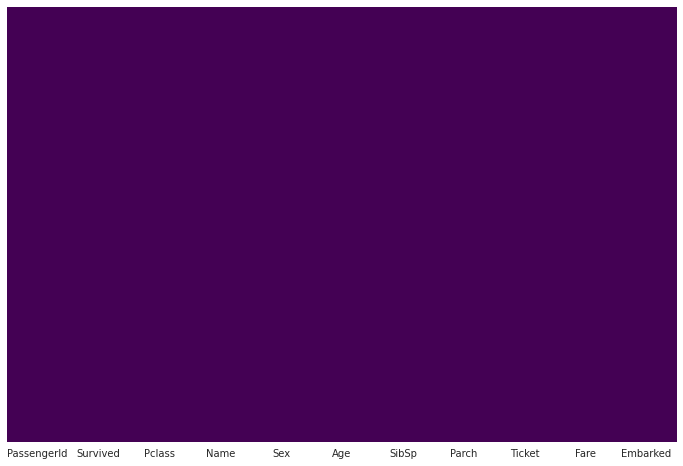

In [24]:
# Podemos verificar que nossos Dados de train estão agora todos completos

plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


In [25]:
# Verificamos nossos Dados de train com o método .info()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Vejamos agora nossos Dados de test

In [26]:
test['Age'] = test[['Age', 'Pclass']].apply(inputar_idade, axis=1)

Na coluna ``Fare`` ta faltando um Dado. Então, podemos eliminar toda a linha onde se encontra esse Dado faltante ou subtituir pela média de toda a coluna. 


Nós vamos a preencher com a média de nossos Dados respeito desta coluna.

In [27]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### Convertendo as características categóricas

Obs:

* A coluna ``Name`` não tem como ser tratada porque esses dados são diferentes. Melhor dito essa coluna ``Name`` não pode ser relevante para definir se essa pessoa sobreviveu ou não-sobreviveu.

* A coluna ``Ticket`` não é relevante porque os dados são muito aleatórios (dados todos diferentes).

In [29]:
# Vamos a converter a coluna "Sex"
# Para fazer isso primeiro criamos uma função que vai nos ajudar nisso

def sex_categ_num(x):
  if x == 'male':
    return 1
  elif x == 'female':
    return 0  


In [30]:

train['Sex'] = train['Sex'].apply(sex_categ_num)

Agora vamos a converter a coluna ``Embarked`` a numérico.

Ao fazer isso, vamos ter três colunas (C, Q e S). Dessas três podemos eliminar uma, já que  automaticamente inferimos a terceira. 


In [31]:
# Vejamos nossa coluna de "Embarked"

train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# Podemos fazer o seguinte (criamos uma instância):

embark = pd.get_dummies(train['Embarked'], drop_first = True)


In [33]:
embark.head(7)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1


A seguir vamos a eliminar algumas as colunas que não são utéis para nosso propósito.

In [34]:
train.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare'], axis=1, inplace=True)

A seguir vamos a colcoar as novas informações que criamos e eliminar aquela que foi convertida.



In [35]:
train = pd.concat([train, embark], axis=1) 

In [36]:
# Eliminamos a coluna "Embarked"

del train['Embarked']

In [37]:

train.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Q,S
0,0,3,1,1,0,0,1
1,1,1,0,1,0,0,0
2,1,3,0,0,0,0,1
3,1,1,0,1,0,0,1
4,0,3,1,0,0,0,1


### Vamos a preparar também nossos Dados de test

In [38]:
test['Sex'] = test['Sex'].apply(sex_categ_num)

In [39]:
embark = pd.get_dummies(test['Embarked'], drop_first = True)


In [40]:
test = pd.concat([test, embark], axis=1) 

In [41]:
test.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare'], axis=1, inplace=True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Sex       418 non-null    int64 
 2   SibSp     418 non-null    int64 
 3   Parch     418 non-null    int64 
 4   Embarked  418 non-null    object
 5   Q         418 non-null    uint8 
 6   S         418 non-null    uint8 
dtypes: int64(4), object(1), uint8(2)
memory usage: 17.3+ KB


In [43]:
del test['Embarked']
test.head(3)

,Pclass,Sex,SibSp,Parch,Q,S
0,3,1,0,0,1,0
1,3,0,1,0,0,1
2,2,1,0,0,1,0


# Preparamos nossos Dados de treinamento e teste

In [44]:
x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
x_test = test

In [45]:
print("Forma de x_train: ", x_train.shape)
print("")
print("Forma de y_train: ", y_train.shape)
print("")
print("Foram de x_test: ", x_test.shape)

Forma de x_train:  (891, 6)

Forma de y_train:  (891,)

Foram de x_test:  (418, 6)


## Contruindo nosso modelo (Red Neural)

In [46]:
model = Sequential()

model.add(Dense(units = 16, input_shape = (6,), activation = 'relu'))

model.add(Dense(units = 128, activation = 'relu',
                kernel_initializer = 'he_normal', use_bias = False))

model.add(BatchNormalization())

model.add(Dense(units = 64, activation = 'relu',
                kernel_initializer = 'he_normal', use_bias = False))

model.add(Dropout(0.1))

model.add(Dense(units = 32, activation = 'relu',
                kernel_initializer = 'he_normal', use_bias = False))

model.add(Dropout(0.1))

model.add(Dense(units = 16, activation = 'relu'))

model.add(Dropout(0.15))

model.add(Dense(units = 8, activation = 'relu'))

model.add(Dense(units = 4, activation = 'relu',
                kernel_initializer = 'he_normal', use_bias = False))

model.add(Dense(units =1 , activation = 'sigmoid'))


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2048      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8192      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [48]:
# Compilando nosso modelo

model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"])


In [49]:
# Fitting nosso modelo

training = model.fit(x_train, y_train, batch_size = 32,
                     validation_split=0.20, verbose = 2, epochs = 100)


Epoch 1/100
23/23 - 1s - loss: 0.7073 - accuracy: 0.5534 - val_loss: 0.6797 - val_accuracy: 0.6425
Epoch 2/100
23/23 - 0s - loss: 0.6219 - accuracy: 0.7065 - val_loss: 0.6304 - val_accuracy: 0.6425
Epoch 3/100
23/23 - 0s - loss: 0.5211 - accuracy: 0.7739 - val_loss: 0.5646 - val_accuracy: 0.7095
Epoch 4/100
23/23 - 0s - loss: 0.5398 - accuracy: 0.7683 - val_loss: 0.5264 - val_accuracy: 0.7542
Epoch 5/100
23/23 - 0s - loss: 0.4770 - accuracy: 0.7978 - val_loss: 0.5045 - val_accuracy: 0.7654
Epoch 6/100
23/23 - 0s - loss: 0.4805 - accuracy: 0.7851 - val_loss: 0.4693 - val_accuracy: 0.8045
Epoch 7/100
23/23 - 0s - loss: 0.4625 - accuracy: 0.7992 - val_loss: 0.4572 - val_accuracy: 0.7989
Epoch 8/100
23/23 - 0s - loss: 0.4750 - accuracy: 0.8048 - val_loss: 0.4428 - val_accuracy: 0.7989
Epoch 9/100
23/23 - 0s - loss: 0.4593 - accuracy: 0.8104 - val_loss: 0.4402 - val_accuracy: 0.7989
Epoch 10/100
23/23 - 0s - loss: 0.4596 - accuracy: 0.8076 - val_loss: 0.4175 - val_accuracy: 0.8212
Epoch 11/

In [50]:
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 81.68%


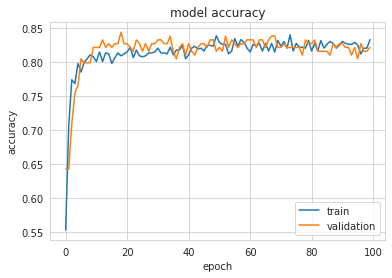

In [51]:
# summarize history for accuracy

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

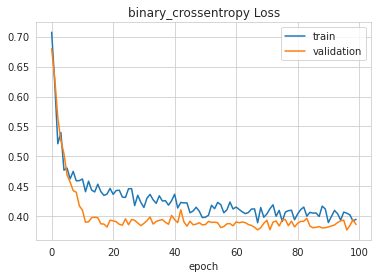

In [52]:
# summarize history for Loss

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('binary_crossentropy Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Fazemos predições para nossos Dados de teste

In [53]:
y_pred = model.predict(x_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])


[0.04793967 0.3513074  0.04236006 0.14953288 0.60342777 0.14953288
 0.761064   0.37301302 0.6405086  0.00872714]
[0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]


**NOTA:**
É recomendável seguir treinando o modelo para obter um valor menor da ``Loss`` e um valor mais alto da ``accuracy``.
